In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np
#import altair as alt
import matplotlib.pyplot as plt

In another code all data was cleaned up via python: Following the approach developed in Section 2.2 to read the files for the female runners and 
then process them using the functions in Section 2.3 to create a data frame for analysis. You may need to generalize the createDF() and extractVariables() 
functions to handle additional oddities in the raw text files. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jjschueder/7333QTW/master/Case%20Study%202/StevensFinal.csv',low_memory=False)


# verify data read in
df.tail(100)

,Gender,year,place,div_total,name,age,hometown,time,pace,numId,...,time_length,fcobmine,finaltime,hour,minutes,seconds,dursecs,durationminutes,calcpace,counter
145940,Male,2012,7094,922/931,Stephen Godfrey,44.0,Arlington VA,NaN,12:57,16558,...,7,2:09:22,1/1/1900 2:09,2,9,22,7762,129.366667,12.936667,1.0
145941,Male,2012,7095,638/648,Elliott Lomax,46.0,Bowie MD,NaN,12:57,13540,...,7,2:09:27,1/1/1900 2:09,2,9,27,7767,129.450000,12.945000,1.0
145942,Male,2012,7096,1078/1093,Brian Hughes,35.0,Herndon VA,NaN,12:57,21251,...,7,2:09:29,1/1/1900 2:09,2,9,29,7769,129.483333,12.948333,1.0
145943,Male,2012,7097,923/931,Jerry McGuigan,41.0,Waldorf MD,NaN,12:58,20710,...,7,2:09:32,1/1/1900 2:09,2,9,32,7772,129.533333,12.953333,1.0
145944,Male,2012,7098,369/375,John Storey,55.0,York PA,NaN,12:58,8905,...,7,2:09:32,1/1/1900 2:09,2,9,32,7772,129.533333,12.953333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146035,Male,2012,7189,1092/1093,Jurek Grabowski,39.0,Fairfax VA,NaN,14:44,19845,...,7,2:27:11,1/1/1900 2:27,2,27,11,8831,147.183333,14.718333,1.0
146036,Male,2012,7190,375/375,Larry Hume,56.0,Arlington VA,NaN,14:44,18780,...,7,2:27:20,1/1/1900 2:27,2,27,20,8840,147.333333,14.733333,1.0
146037,Male,2012,7191,1093/1093,Sean-Patrick Alexander,35.0,Alexandria VA,NaN,14:45,19104,...,7,2:27:30,1/1/1900 2:27,2,27,30,8850,147.500000,14.750000,1.0
146038,Male,2012,7192,,Joseph White,NaN,Forestville MD,NaN,14:54,22280,...,7,2:28:58,1/1/1900 2:28,2,28,58,8938,148.966667,14.896667,1.0


In [3]:
df.head(100)

,Gender,year,place,div_total,name,age,hometown,time,pace,numId,...,time_length,fcobmine,finaltime,hour,minutes,seconds,dursecs,durationminutes,calcpace,counter
0,Female,1999,1,1/1683,Jane Omoro,26.0,Kenya,53:37:00,5:22,NaN,...,5,0:53:37,1/1/1900 0:53,0,53,37,3217,53.616667,5.361667,NaN
1,Female,1999,2,2/1683,Jane Ngotho,29.0,Kenya,53:38:00,5:22,NaN,...,5,0:53:38,1/1/1900 0:53,0,53,38,3218,53.633333,5.363333,NaN
2,Female,1999,3,,Lidiya Grigoryeva,25.0,Russia,53:40:00,5:22,NaN,...,5,0:53:40,1/1/1900 0:53,0,53,40,3220,53.666667,5.366667,NaN
3,Female,1999,4,3/1683,Eunice Sagero,20.0,Kenya,53:55:00,5:24,NaN,...,5,0:53:55,1/1/1900 0:53,0,53,55,3235,53.916667,5.391667,NaN
4,Female,1999,5,4/1683,Alla Zhilyayeva,29.0,Russia,54:08:00,5:25,NaN,...,5,0:54:08,1/1/1900 0:54,0,54,8,3248,54.133333,5.413333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,1999,96,74/1683,Ruth Fellingham,29.0,Washington DC,1:11:44,7:11,NaN,...,7,1:11:44,1/1/1900 1:11,1,11,44,4304,71.733333,7.173333,NaN
96,Female,1999,97,13/306,Julia Kashkashian,41.0,Falls Church VA,1:11:53,7:12,NaN,...,7,1:11:53,1/1/1900 1:11,1,11,53,4313,71.883333,7.188333,NaN
97,Female,1999,98,2/115,Hideko Pirie,54.0,Fairfax VA,1:11:53,7:12,NaN,...,7,1:11:53,1/1/1900 1:11,1,11,53,4313,71.883333,7.188333,NaN
98,Female,1999,99,5/185,Valerie Campbell,48.0,Alexandria VA,1:11:55,7:12,NaN,...,7,1:11:55,1/1/1900 1:11,1,11,55,4315,71.916667,7.191667,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146040 entries, 0 to 146039
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Gender           146040 non-null  object 
 1   year             146040 non-null  int64  
 2   place            146040 non-null  int64  
 3   div_total        132452 non-null  object 
 4   name             146040 non-null  object 
 5   age              146008 non-null  float64
 6   hometown         146038 non-null  object 
 7   time             5546 non-null    object 
 8   pace             103070 non-null  object 
 9   numId            140352 non-null  object 
 10  guntime          140494 non-null  object 
 11  netTime          100416 non-null  object 
 12  combtime         146040 non-null  object 
 13  time_length      146040 non-null  int64  
 14  fcobmine         146040 non-null  object 
 15  finaltime        146040 non-null  object 
 16  hour             146040 non-null  int6

In [5]:
df.dtypes

Gender              object
year                 int64
place                int64
div_total           object
name                object
age                float64
hometown            object
time                object
pace                object
numId               object
guntime             object
netTime             object
combtime            object
time_length          int64
fcobmine            object
finaltime           object
hour                 int64
minutes              int64
seconds              int64
dursecs              int64
durationminutes    float64
calcpace           float64
counter            float64
dtype: object

Various cleanup to do analysis on time.  Covnerting to time format, then converting into seconds. 

In [6]:
# df['time_length'] = df['combtime'].apply(len)

In [7]:
# df.loc[df.time_length == 5, 'fcobmine'] = "00:" + df['combtime']
# df.loc[df.time_length == 7, 'fcobmine'] =  df['combtime']

In [8]:
# df['finaltime'] = pd.to_datetime(df['fcobmine'], format='%H:%M:%S')

In [9]:
# df = df.dropna(subset=['fcobmine'])

In [10]:
# df['hour'] = df['finaltime'].dt.strftime("%H")
# df['minutes'] = df['finaltime'].dt.strftime("%M")
# df['seconds'] = df['finaltime'].dt.strftime("%S")

# df['dursecs'] = pd.to_numeric(df['hour']) * 3600 + pd.to_numeric(df['minutes']) * 60 + pd.to_numeric(df['seconds'])

A little cleanup of the age column.  After initial loading some of the ages contained alpha characters. Those characters are removed here.

In [11]:
# df['agenum'] =df['age'].str.replace(r"[a-zA-Z]",'')
# df['agenum'] = pd.to_numeric(df['agenum'])

In [12]:
# df = df.replace(r'^\s+$', np.nan, regex=True)
# df = df.dropna(subset=['agenum'])

Check out results of cleaning

In [13]:
df.head()

,Gender,year,place,div_total,name,age,hometown,time,pace,numId,...,time_length,fcobmine,finaltime,hour,minutes,seconds,dursecs,durationminutes,calcpace,counter
0,Female,1999,1,1/1683,Jane Omoro,26.0,Kenya,53:37:00,5:22,NaN,...,5,0:53:37,1/1/1900 0:53,0,53,37,3217,53.616667,5.361667,NaN
1,Female,1999,2,2/1683,Jane Ngotho,29.0,Kenya,53:38:00,5:22,NaN,...,5,0:53:38,1/1/1900 0:53,0,53,38,3218,53.633333,5.363333,NaN
2,Female,1999,3,,Lidiya Grigoryeva,25.0,Russia,53:40:00,5:22,NaN,...,5,0:53:40,1/1/1900 0:53,0,53,40,3220,53.666667,5.366667,NaN
3,Female,1999,4,3/1683,Eunice Sagero,20.0,Kenya,53:55:00,5:24,NaN,...,5,0:53:55,1/1/1900 0:53,0,53,55,3235,53.916667,5.391667,NaN
4,Female,1999,5,4/1683,Alla Zhilyayeva,29.0,Russia,54:08:00,5:25,NaN,...,5,0:54:08,1/1/1900 0:54,0,54,8,3248,54.133333,5.413333,NaN


In [14]:
df.tail()

,Gender,year,place,div_total,name,age,hometown,time,pace,numId,...,time_length,fcobmine,finaltime,hour,minutes,seconds,dursecs,durationminutes,calcpace,counter
146035,Male,2012,7189,1092/1093,Jurek Grabowski,39.0,Fairfax VA,NaN,14:44,19845,...,7,2:27:11,1/1/1900 2:27,2,27,11,8831,147.183333,14.718333,1.0
146036,Male,2012,7190,375/375,Larry Hume,56.0,Arlington VA,NaN,14:44,18780,...,7,2:27:20,1/1/1900 2:27,2,27,20,8840,147.333333,14.733333,1.0
146037,Male,2012,7191,1093/1093,Sean-Patrick Alexander,35.0,Alexandria VA,NaN,14:45,19104,...,7,2:27:30,1/1/1900 2:27,2,27,30,8850,147.500000,14.750000,1.0
146038,Male,2012,7192,,Joseph White,NaN,Forestville MD,NaN,14:54,22280,...,7,2:28:58,1/1/1900 2:28,2,28,58,8938,148.966667,14.896667,1.0
146039,Male,2012,7193,648/648,Lee Jordan,48.0,Herndon VA,NaN,15:06,6555,...,7,2:30:59,1/1/1900 2:30,2,30,59,9059,150.983333,15.098333,1.0


### Basic Visualizations

We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the [female] runners across all 14 years of the races. Use quantile–quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change? 

#### Boxplots

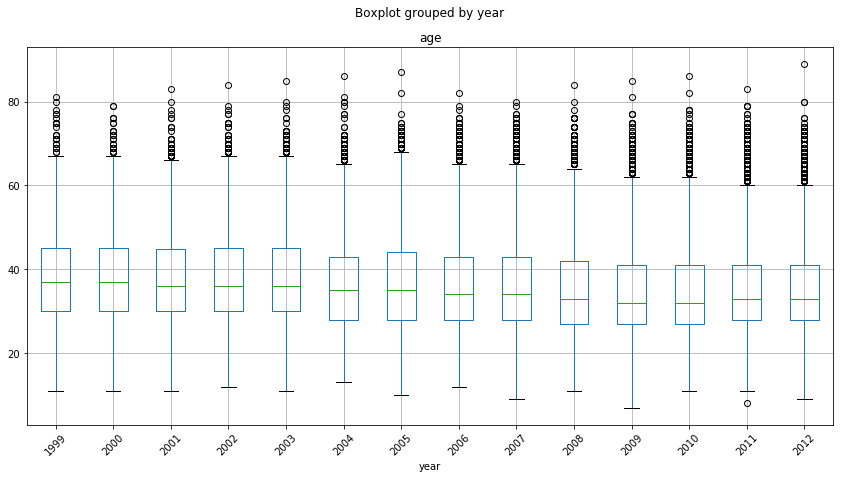

In [10]:
# display boxplot 
bx = df.boxplot(column = 'age', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [11]:
df.dtypes

Gender              object
year                 int64
place                int64
div_total           object
name                object
age                float64
hometown            object
time                object
pace                object
numId               object
guntime             object
netTime             object
combtime            object
time_length          int64
fcobmine            object
finaltime           object
hour                 int64
minutes              int64
seconds              int64
dursecs              int64
durationminutes    float64
calcpace           float64
counter            float64
dtype: object

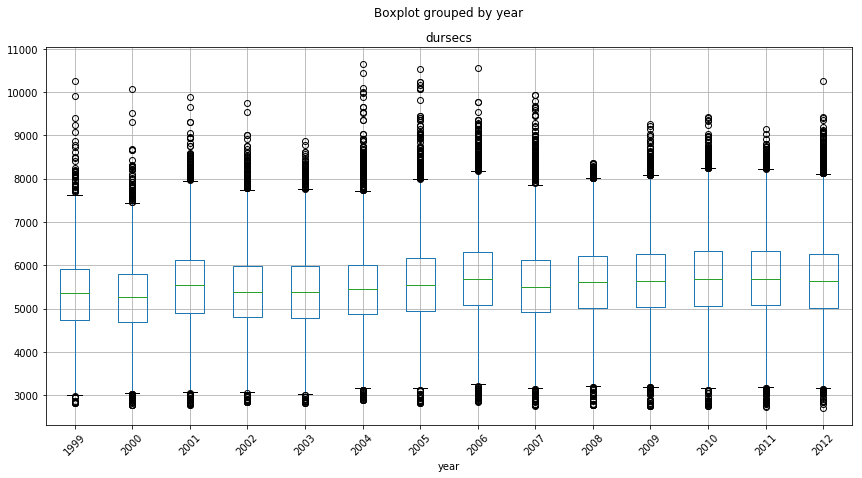

In [12]:
bx = df.boxplot(column = 'dursecs', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [152]:
#df['avgmile'] = df['dursecs'] / 10 

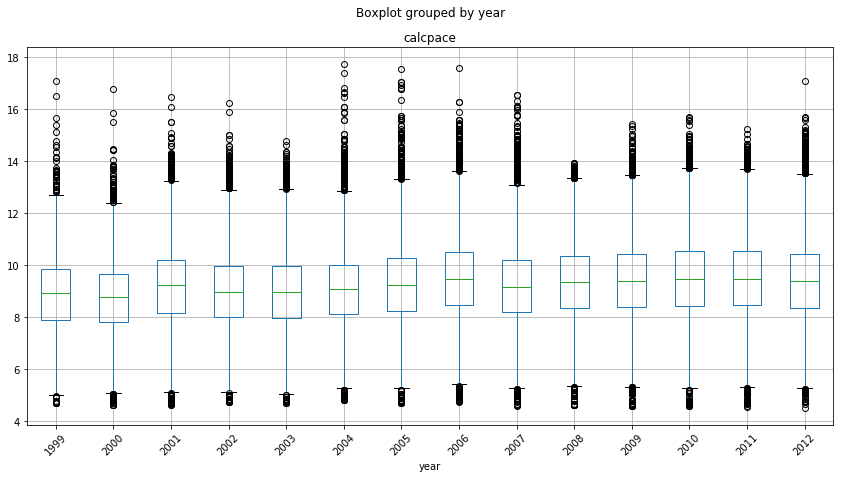

In [13]:
bx = df.boxplot(column = 'calcpace', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [14]:
bins = [1, 19, 24, 29,
34,
39,
44,
49,
54,
59,
64,
69,
74,
79,
99]
df['agebinned'] = pd.cut(df['age'], bins)

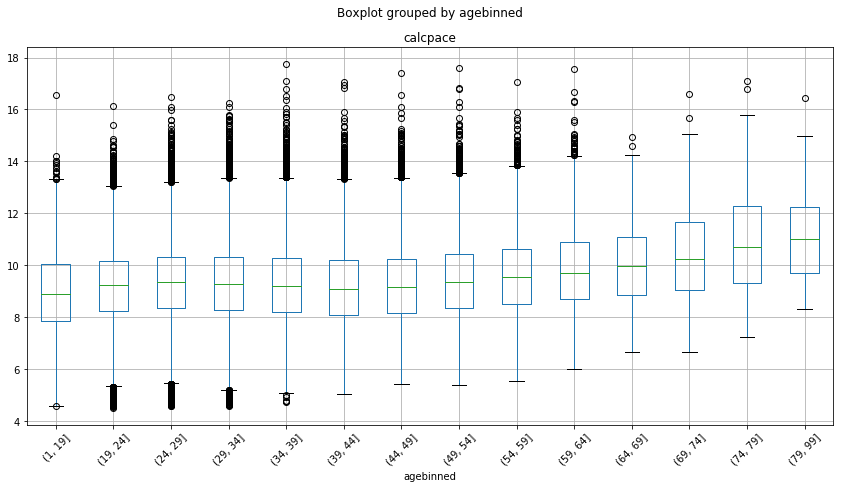

In [15]:
bx = df.boxplot(column = 'calcpace', by = 'agebinned', figsize=(14,7))
plt.xticks(rotation=45)
bx

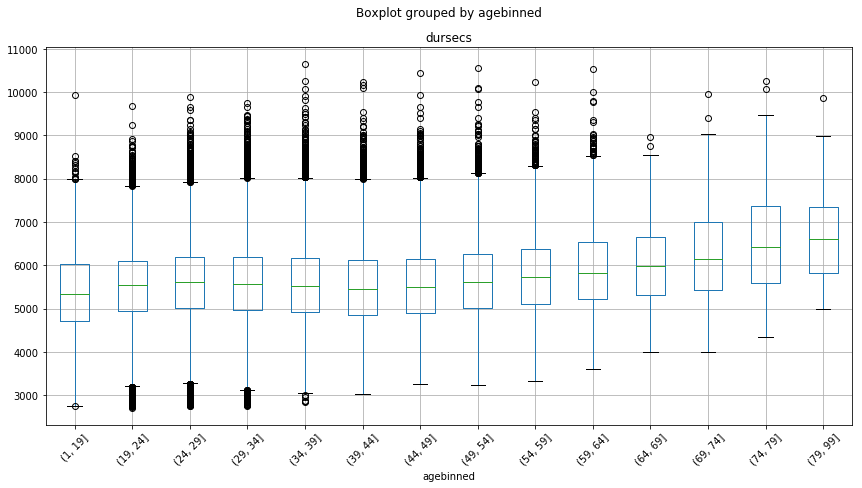

In [16]:
bx = df.boxplot(column = 'dursecs', by = 'agebinned', figsize=(14,7))
plt.xticks(rotation=45)
bx

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
C:\An

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, 'Pair Plots by with Year Coloring')

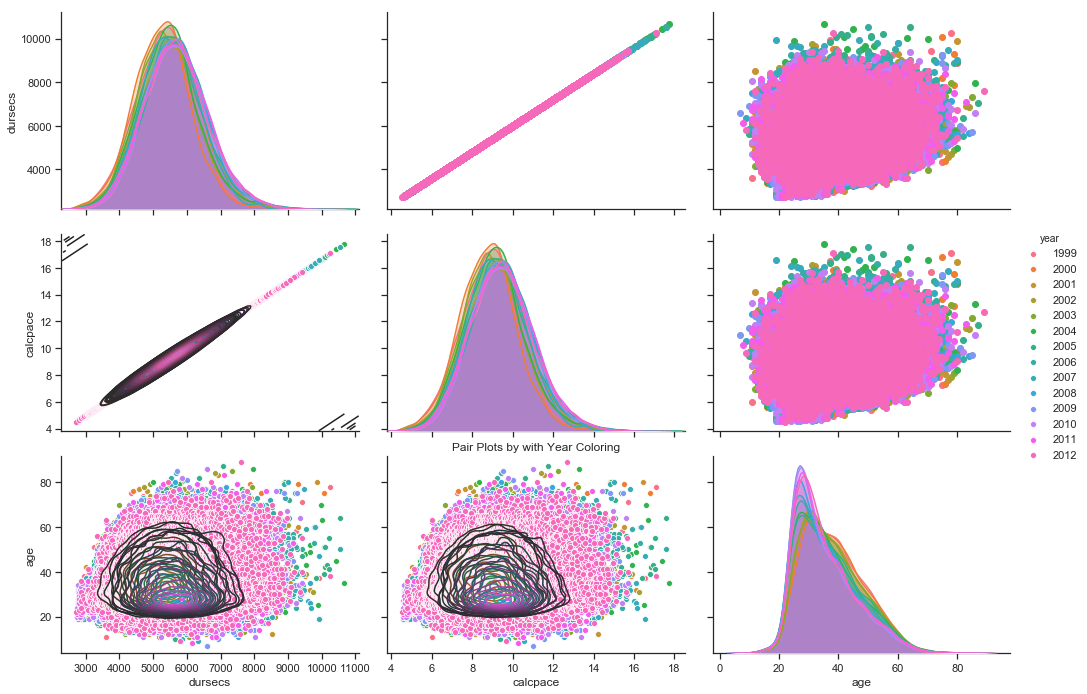

In [19]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["dursecs", "calcpace", "age"], hue = "year", height=3.27, aspect=4.7/3.27)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
#iris = sns.load_dataset("iris")8.7/8.27)
plt.title('Pair Plots by with Year Coloring')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

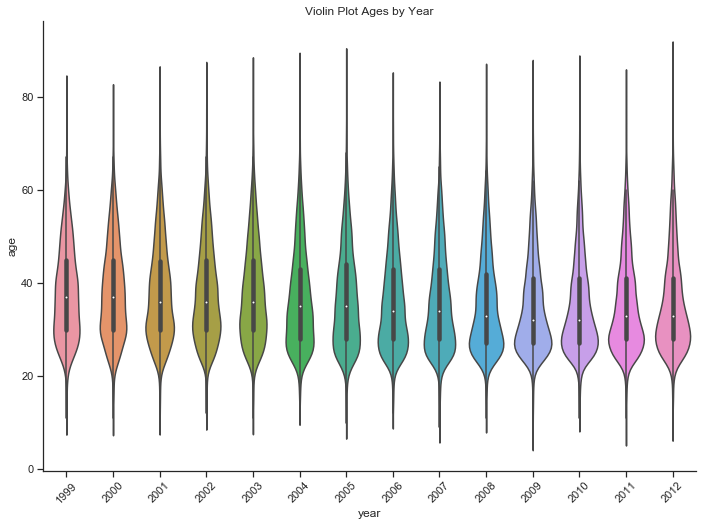

In [20]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="year", y="age", data=df)    
sns.despine()
plt.title('Violin Plot Ages by Year')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

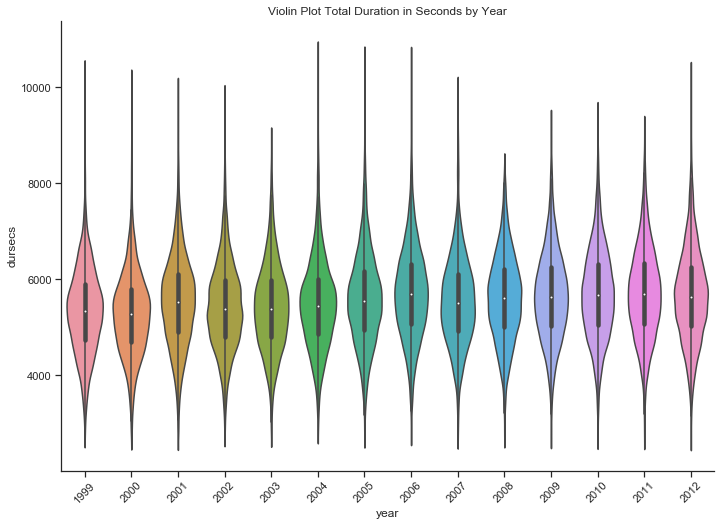

In [21]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="year", y="dursecs", data=df)    
sns.despine()
plt.title('Violin Plot Total Duration in Seconds by Year')
plt.xticks(rotation=45)

Text(0, 0.5, 'Age')

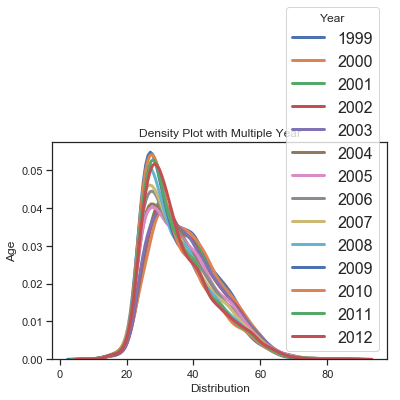

In [23]:
# List of five airlines to plot
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

# Iterate through the five airlines
for years in years:
    # Subset to the airline
    subset = df[df['year'] == years]
    
    # Draw the density plot
    g = sns.distplot(subset['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = years)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Year')
plt.title('Density Plot with Multiple Year')
plt.rcParams['figure.figsize']=20,10
plt.xlabel('Distribution')
plt.ylabel('Age')

No handles with labels found to put in legend.


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text xticklabel objects>)

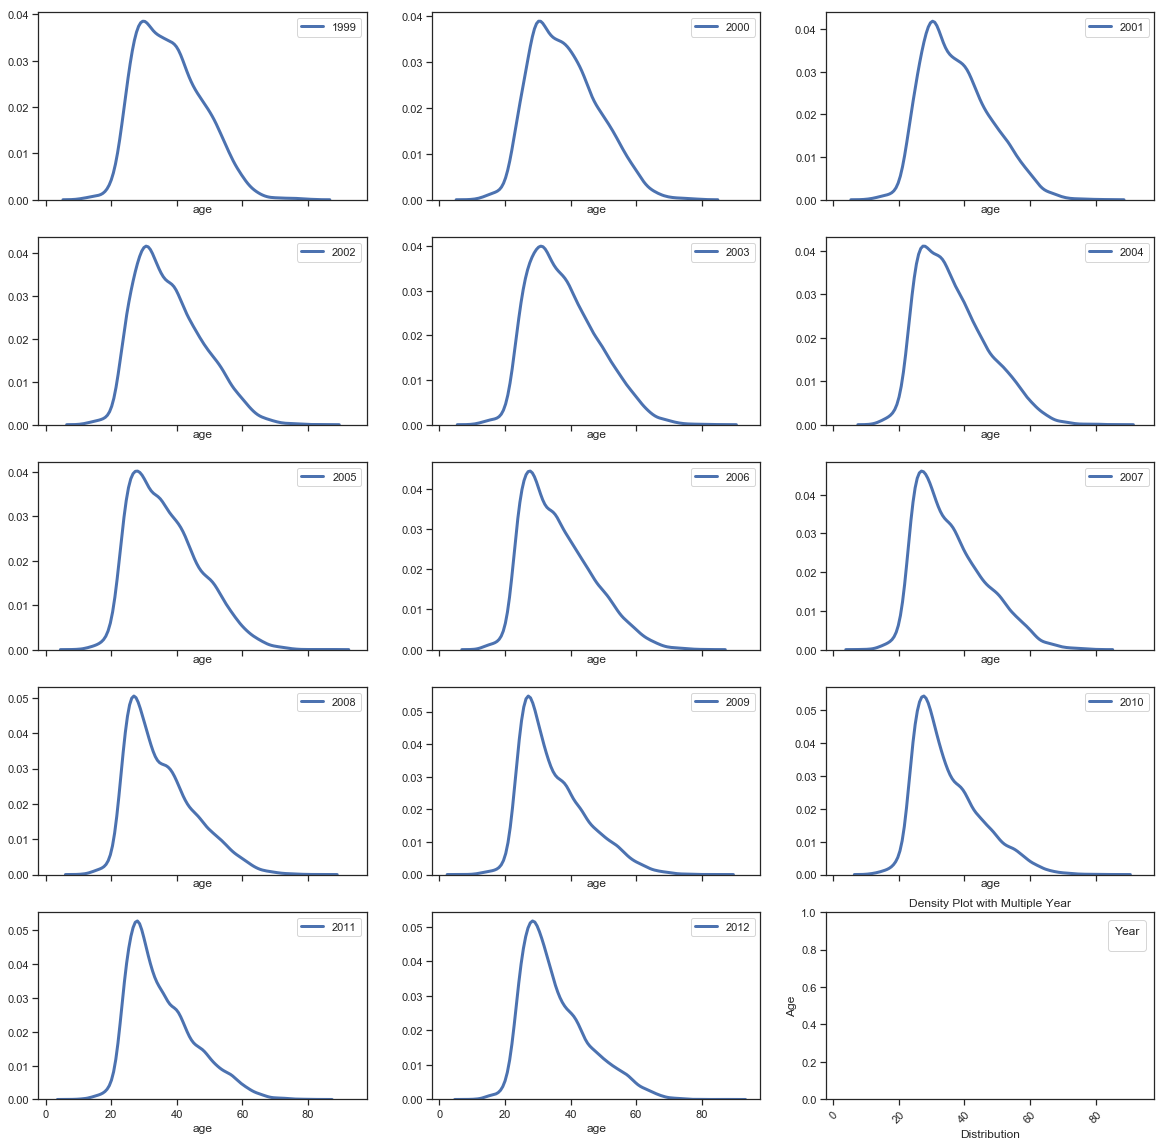

In [24]:
# List of five airlines to plot
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
f, axes = plt.subplots(5, 3, figsize=(20, 20), sharex=True)
# Iterate through the five airlines
x = 0
y = 0
for years in years:
    # Subset to the airline
    subset = df[df['year'] == years]
    # Draw the density plot
    g = sns.distplot(subset['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = years, ax=axes[x, y])
    y += 1
    if (y% 3 == 0):
     x += 1
     y = 0
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Year')
plt.title('Density Plot with Multiple Year')
#plt.rcParams['figure.figsize']=20,10
plt.xlabel('Distribution')
plt.ylabel('Age')
plt.xticks(rotation=45)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 11 Text xticklabel objects>)

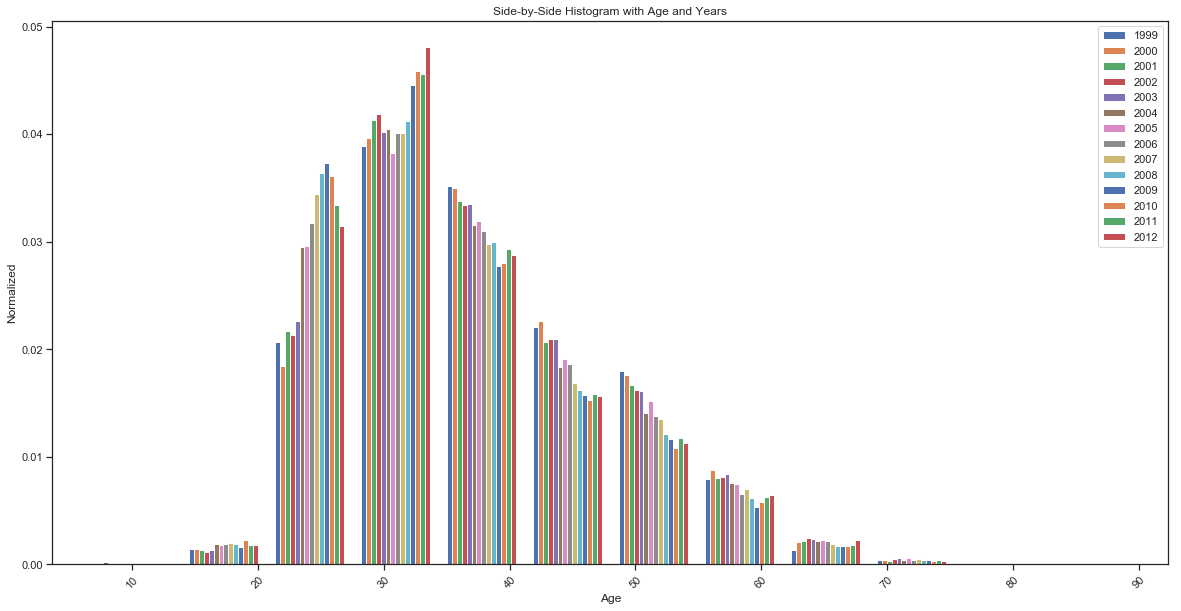

In [26]:
# Make a separate list for each airline
x1 = list(df[df['year'] == 1999]['age'])
x2 = list(df[df['year'] == 2000]['age'])
x3 = list(df[df['year'] == 2001]['age'])
x4 = list(df[df['year'] == 2002]['age'])
x5 = list(df[df['year'] == 2003]['age'])
x6 = list(df[df['year'] == 2004]['age'])
x7 = list(df[df['year'] == 2005]['age'])
x8 = list(df[df['year'] == 2006]['age'])
x9 = list(df[df['year'] == 2007]['age'])
x10 = list(df[df['year'] == 2008]['age'])
x11 = list(df[df['year'] == 2009]['age'])
x12 = list(df[df['year'] == 2010]['age'])
x13 = list(df[df['year'] == 2011]['age'])
x14 = list(df[df['year'] == 2012]['age'])
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14], bins = int(180/15), normed=True,
          label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normalized')
plt.title('Side-by-Side Histogram with Age and Years')
plt.xticks(rotation=45)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


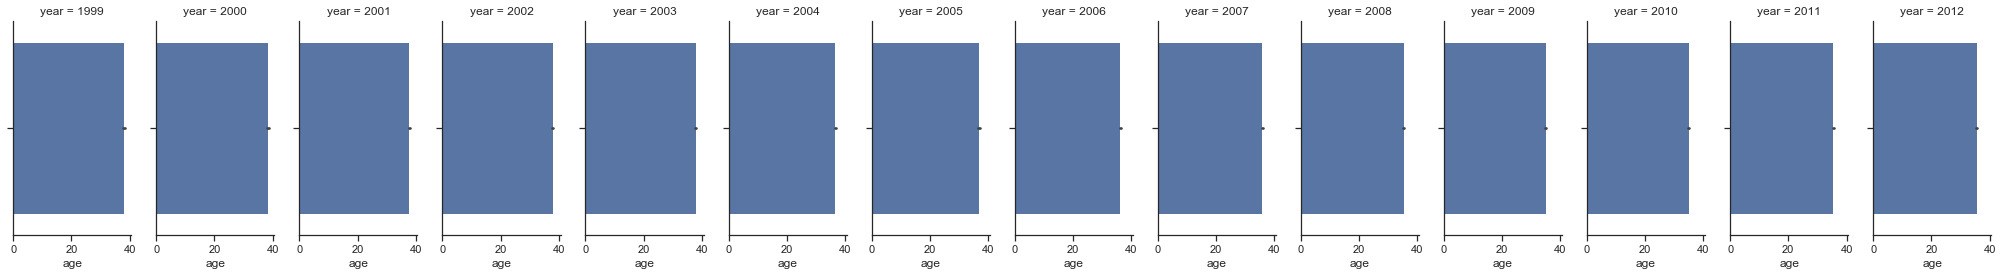

In [27]:
plt.rcParams['figure.figsize']=20,10
g = sns.FacetGrid(df, col="year", height=4, aspect=.5)
g.map(sns.barplot, "age");

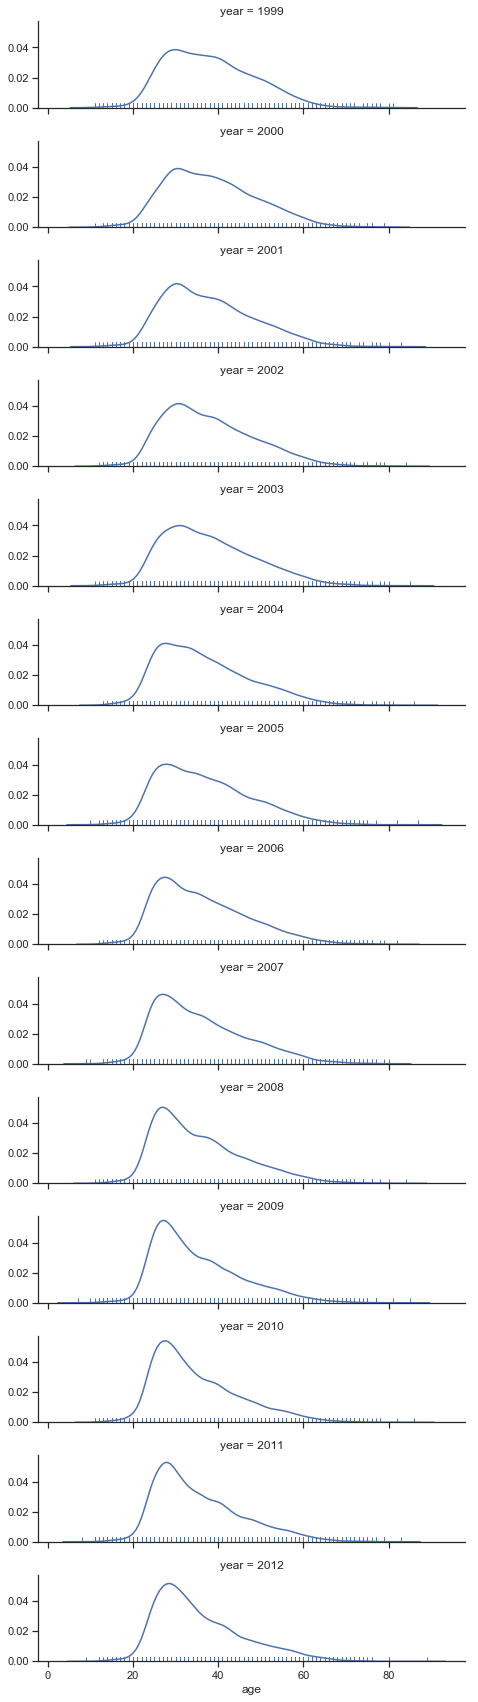

In [28]:
ordered_days = df.year.value_counts().index
g = sns.FacetGrid(df, row="year",  
                  height=1.7, aspect=4,)
g.map(sns.distplot, "age", hist=False, rug=True);

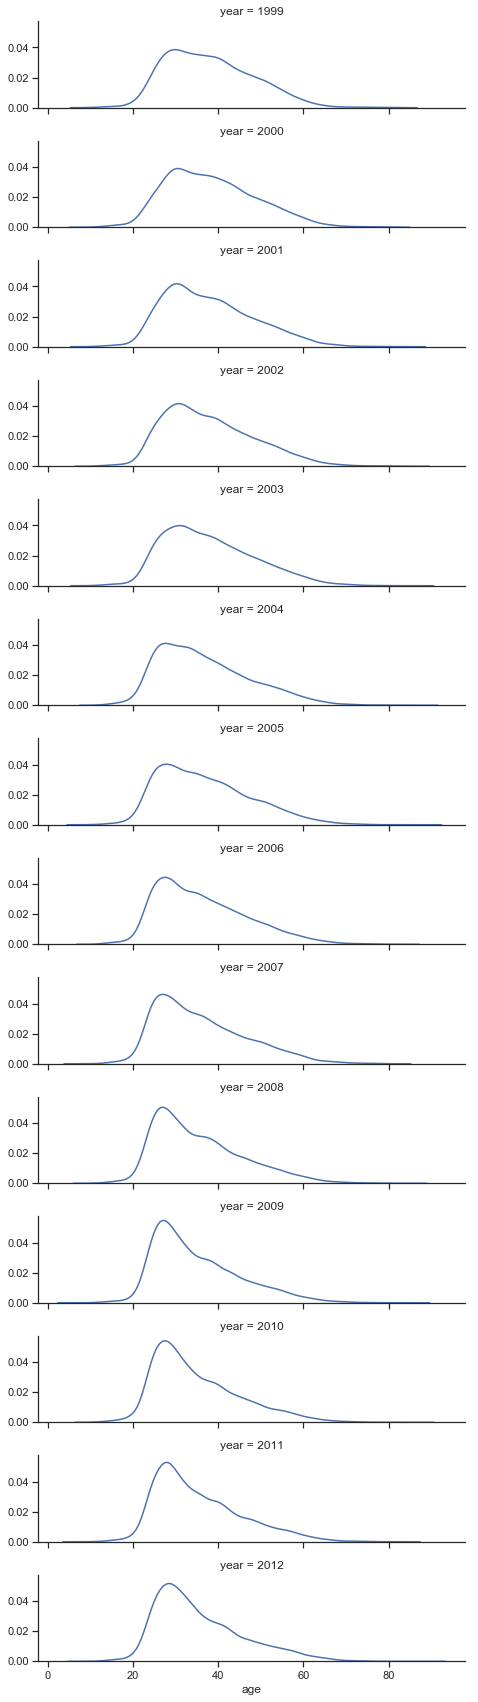

In [29]:
ordered_days = df.year.value_counts().index
g = sns.FacetGrid(df, row="year",  
                  height=1.7, aspect=4,)
g.map(sns.distplot, "age", hist=False, kde = True);

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146040 entries, 0 to 146039
Data columns (total 24 columns):
Gender             146040 non-null object
year               146040 non-null int64
place              146040 non-null int64
div_total          132407 non-null object
name               146040 non-null object
age                146008 non-null float64
hometown           145911 non-null object
time               5546 non-null object
pace               103070 non-null object
numId              140352 non-null object
guntime            140494 non-null object
netTime            100416 non-null object
combtime           146040 non-null object
time_length        146040 non-null int64
fcobmine           146040 non-null object
finaltime          146040 non-null object
hour               146040 non-null int64
minutes            146040 non-null int64
seconds            146040 non-null int64
dursecs            146040 non-null int64
durationminutes    146040 non-null float64
calcpace      

LinAlgError: SVD did not converge in Linear Least Squares

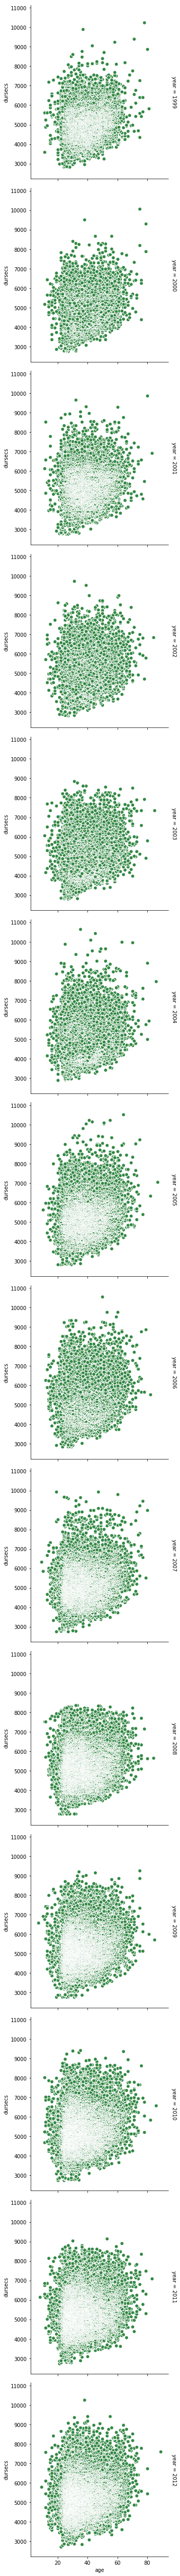

In [6]:
g = sns.FacetGrid(df, row="year",  margin_titles=True, height=5)
g.map(plt.scatter, "age", "dursecs", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    m, b = np.polyfit(df['age'], df['dursecs'], 1)
    ax.plot(df['age'], m*df['age'] + b)
#g.set(xlim=(0, 60), ylim=(0, 14));